In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 # batch size

In [3]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 89.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/My Drive/Snake Recognizer Project

/content/drive/My Drive/Snake Recognizer Project


In [7]:
!zip -r '/content/drive/My Drive/Snake Recognizer Project/snake_data.zip' '/content/drive/My Drive/Snake Recognizer Project/data'

Scanning files 
updating: content/drive/My Drive/Snake Recognizer Project/data/ (stored 0%)
  adding: content/drive/My Drive/Snake Recognizer Project/data/Monocled cobra/ (stored 0%)
  adding: content/drive/My Drive/Snake Recognizer Project/data/Monocled cobra/c7a37459-b364-4ed2-a379-b2ce6c642a5d.jpg (deflated 0%)
  adding: content/drive/My Drive/Snake Recognizer Project/data/Monocled cobra/eca1f1b6-8332-43da-a9f2-7f5dd2fcf150.jpg (deflated 0%)
  adding: content/drive/My Drive/Snake Recognizer Project/data/Monocled cobra/340495ff-6b57-456e-a033-88b55bc1e658.jpg (deflated 2%)
  adding: content/drive/My Drive/Snake Recognizer Project/data/Monocled cobra/48c98519-4d70-4656-aaf3-c609cdb743b6.jpg (stored 0%)
  adding: content/drive/My Drive/Snake Recognizer Project/data/Monocled cobra/7d5cd539-c37f-405b-ae32-568b7679494e.jpg (deflated 0%)
  adding: content/drive/My Drive/Snake Recognizer Project/data/Monocled cobra/a05ea309-b383-49f7-ad2b-07cea45c3eeb.jpg (deflated 2%)
  adding: content/dri

In [8]:
snake_labels = [
    "Monocled cobra",
    "Egyptian cobra",
    "Black-necked spitting cobra",
    "Samar cobra",
    "Red spitting cobra",
    "Javan spitting cobra",
    "Spectacled cobra",
    "Russell's viper",
    "Horned vipers",
    "Bush vipers",
    "Eyelash viper",
    "Saw-scaled vipers",
    "Banded krait",
    "Black mamba",
    "Inland taipan",
    "Eastern brown snake",
    "Rattle snake",
    "King cobra"
]
len(snake_labels)

18

In [9]:
data_path = "data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for snake_type in snake_labels:

  dest = f"{data_path}/{snake_type}"
  if not os.path.exists(dest):
    os.mkdir(dest)

  try:
    snake_image_urls = search_images_ddg(snake_type)
    download_images(dest, urls = snake_image_urls)

  except:
    continue

In [10]:
image_counts = get_image_files(data_path)
image_counts

(#6935) [Path('data/Monocled cobra/c7a37459-b364-4ed2-a379-b2ce6c642a5d.jpg'),Path('data/Monocled cobra/eca1f1b6-8332-43da-a9f2-7f5dd2fcf150.jpg'),Path('data/Monocled cobra/340495ff-6b57-456e-a033-88b55bc1e658.jpg'),Path('data/Monocled cobra/48c98519-4d70-4656-aaf3-c609cdb743b6.jpg'),Path('data/Monocled cobra/7d5cd539-c37f-405b-ae32-568b7679494e.jpg'),Path('data/Monocled cobra/a05ea309-b383-49f7-ad2b-07cea45c3eeb.jpg'),Path('data/Monocled cobra/1b38f682-8112-487e-9f5e-5bad2ca6ac63.jpg'),Path('data/Monocled cobra/eb7157a2-710e-454d-94e5-7daea5e5675d.jpg'),Path('data/Monocled cobra/6ea48a6d-2ece-44c8-857a-fe7e9f1a7677.jpg'),Path('data/Monocled cobra/8651fc2e-b414-4c36-b396-d37c2f9b36e4.jpg')...]

In [11]:
failed = verify_images(image_counts)
failed

(#348) [Path('data/Monocled cobra/b6d866a1-5f42-4e06-9862-4a723ac0ed05.jpg'),Path('data/Monocled cobra/c6f3d7ba-6270-4946-9ee6-b8578f89e2c0.jpg'),Path('data/Monocled cobra/c6dff973-bb8f-4c7f-9fd1-501677b47771.jpg'),Path('data/Monocled cobra/7454aa31-64f1-46cf-9ff7-abb35efb6f84.jpg'),Path('data/Monocled cobra/36bcc0cb-8093-4402-83ab-3ddc868eaec8.jpg'),Path('data/Monocled cobra/8a10ae4a-83d6-42f6-b64f-f3ad4078c98e.jpg'),Path('data/Monocled cobra/f3bbdd89-2238-400a-8ac6-5f377a112043.jpg'),Path('data/Monocled cobra/4404aa9e-b7bf-4a5b-936b-53d898f75fdc.jpg'),Path('data/Monocled cobra/e559a7ee-a303-4af3-96e5-06c6a31dd7cd.jpg'),Path('data/Monocled cobra/d3756a50-2be7-4e8b-8c47-d75f917977bc.jpg')...]

In [12]:
failed.map(Path.unlink)

(#348) [None,None,None,None,None,None,None,None,None,None...]

In [13]:
doc(get_image_files)

In [14]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [15]:
dls = dblock.dataloaders(data_path,bs=bs)

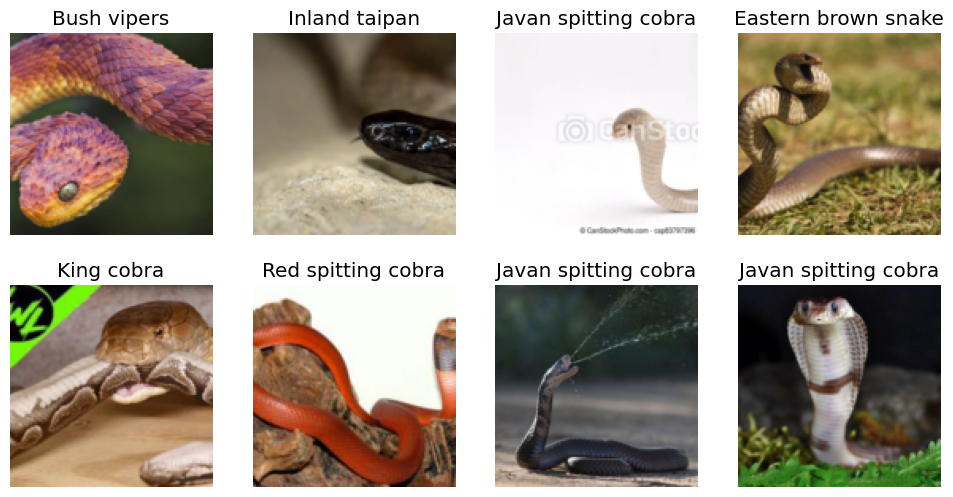

In [16]:
dls.train.show_batch(max_n=8, nrows=2)

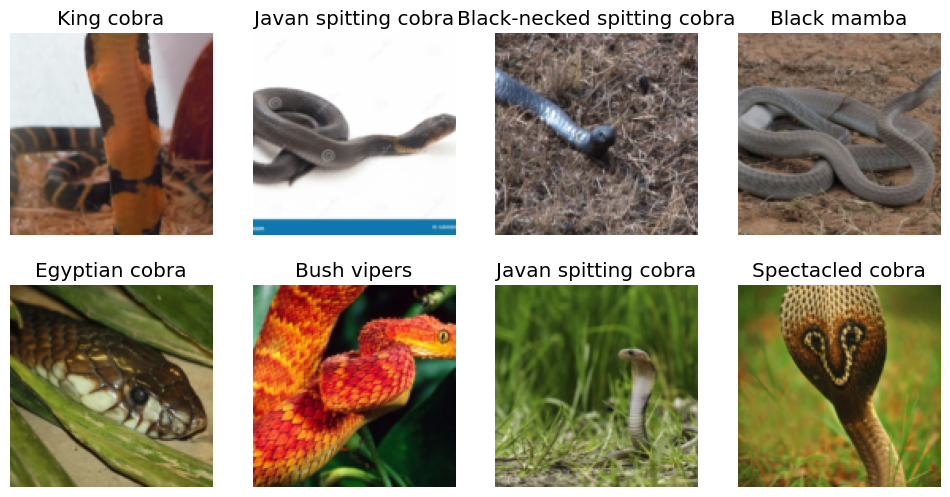

In [17]:
dls.valid.show_batch(max_n=8, nrows=2)

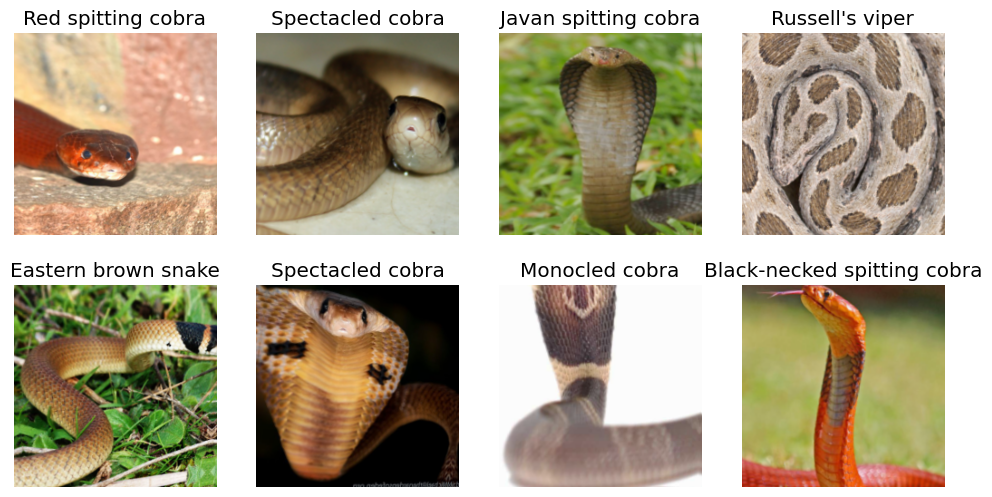

In [18]:
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [19]:
torch.save(dls, "snake_dataloader_v0.pkl")